# 1. Introduction 

## 1.1 Research Question

The goal of this model is to classify emails as spam or non-spam.

## 1.2 Metric for Success

* The goal is to create a Gaussian Naive Bayes classifier with the highest accuracy.
* In training our models, the data set will be split in different proportions to try and understand how different splits affect the accuracy of the data. 


# 2. Reading the Data

In [1]:
# Loading the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Creating a list of our column names

names = ['word_freq_make','word_freq_address','word_freq_all',
'word_freq_3d','word_freq_our','word_freq_over','word_freq_remove',
'word_freq_internet','word_freq_order','word_freq_mail',
'word_freq_receive','word_freq_will','word_freq_people',
'word_freq_report','word_freq_addresses','word_freq_free',
'word_freq_business','word_freq_email','word_freq_you',
'word_freq_credit','word_freq_your','word_freq_font',
'word_freq_000','word_freq_money','word_freq_hp',
'word_freq_hpl','word_freq_george','word_freq_650',
'word_freq_lab','word_freq_labs','word_freq_telnet',
'word_freq_857','word_freq_data','word_freq_415',
'word_freq_85','word_freq_technology','word_freq_1999',
'word_freq_parts','word_freq_pm','word_freq_direct',
'word_freq_cs','word_freq_meeting','word_freq_original',
'word_freq_project','word_freq_re','word_freq_edu',
'word_freq_table','word_freq_conference','char_freq_;',
'char_freq_(','char_freq_[','char_freq_!','char_freq_$',
'char_freq_#','capital_run_length_average','capital_run_length_longest',
'capital_run_length_total','Spam']

In [3]:
# Loading our dataset 

spambase = pd.read_csv('/content/spambase.data', names= names)

spambase.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


# 3. Checking the Data 

In [4]:
# Checking the shape of our dataset

spambase.shape

(4601, 58)

In [5]:
# Checking the information of our dataset

spambase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

# 4. Cleaning the Data 

In [6]:
# Checking for duplicates and dropping them

spambase.duplicated().sum()

# Removing the duplicated values

spambase = spambase.drop_duplicates()


> The dataset had 391 duplicated values which have been droped.

In [7]:
# Checking for null values

spambase.isnull().sum().any()

# No null values so no action needed

False

# 5. Exploratory Data Analysis

In [8]:
# Describing our data

spambase.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Spam
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,0.056686,0.565204,0.097656,0.061211,0.044803,0.253829,0.149154,0.188755,1.718368,0.084962,0.810040,0.131587,0.100622,0.090969,0.573995,0.279330,0.369838,0.128575,0.098382,0.103779,0.063544,0.044917,0.102333,0.045777,0.107881,0.099368,0.143482,0.014190,0.084057,0.061278,0.041432,0.141542,0.048772,0.085266,0.320124,0.189375,0.005786,0.034746,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948,0.398812
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,0.184167,0.882513,0.309309,0.346066,0.242186,0.797534,0.457669,0.541133,1.768760,0.505583,1.149352,1.071258,0.351336,0.431723,1.676539,0.905553,1.775330,0.535429,0.576796,0.439568,0.387267,0.300748,0.569146,0.301812,0.530263,0.386470,0.424508,0.230512,0.447991,0.319520,0.318177,0.793803,0.231871,0.646096,1.045914,0.928308,0.079170,0.298521,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838,0.489712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.360000,0.000000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [9]:
# checking the unique values of our dataset

spambase.Spam.unique()

array([1, 0])

In [10]:
[]

[]

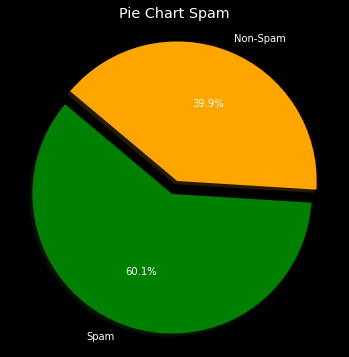

In [11]:
plt.style.use('dark_background')
plt.style.use('bmh')

labels = ['Spam','Non-Spam']

sizes = spambase.Spam.value_counts()

colors = ['green','orange']


explode = (0.1, 0)

plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)


plt.axis('equal')
plt.title('Pie Chart Spam')
plt.show()

# 6. Modelling

In [12]:
spambase['Spam'].values

array([1, 1, 1, ..., 0, 0, 0])

In [13]:
# We first need to separate our features into dependent and independent variables

X = spambase.drop(['Spam'], axis=1).values

y = spambase['Spam'].values

## 6.1 Gaussian Naive Bayes Classifier 

In [14]:
# First we try to classify our emails without splitting the data into train and test sets

# Imporing Gaussian classifier and instantiating it

from sklearn.naive_bayes import GaussianNB 

clf = GaussianNB()

model = clf.fit(X, y)

# Making predictions

y_pred = model.predict(X)

# Evaluating our model

from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y, y_pred) * 100)

Accuracy: 82.89786223277909


In [18]:
# implementing the Gaussian classifier while splitting our data set using 
# 80-20 split, 70-30 split, 60-40 split

from sklearn.model_selection import train_test_split

# Creating a list that will determine out test sizes

test_sizes = [0.2, 0.3, 0.4]

# Looping through our list to use different train and test sets

for test in test_sizes:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test, random_state = 25)

  clf = GaussianNB()

  # Fitting our model
  clf.fit(X_train, y_train)

  # Making prediction 

  y_pred = clf.predict(X_test)

  # Evaluating the model

  accuracy = accuracy_score(y_test, y_pred)

  print("Test size: ", test)

  print("Accuracy Score: ", (accuracy*100.0))

  print("\n")



Test size:  0.2
Accuracy Score:  83.4916864608076


Test size:  0.3
Accuracy Score:  82.89786223277909


Test size:  0.4
Accuracy Score:  82.95724465558195




# 7. Improving the Model

There are two ways to optimize a Gaussian classifier and these include:

* Normalizing
* Removing correlation 

## 7.1 Normalizing

In [16]:
# we generate our lable and features

X = spambase.drop(['Spam'], axis=1).values

y = spambase['Spam'].values

In [20]:
from sklearn.preprocessing import Normalizer

test_sizes = [0.2, 0.3, 0.4]

# Looping through our list to use different train and test sets

for test in test_sizes:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test, random_state = 25)

  # Normalizing 

  norm = Normalizer()

  X_train = norm.fit_transform(X_train)
  X_test = norm.fit_transform(X_test)

  clf = GaussianNB()

  # Fitting our model
  clf.fit(X_train, y_train)

  # Making prediction 

  y_pred = clf.predict(X_test)

  # Evaluating the model

  accuracy = accuracy_score(y_test, y_pred)

  print("Test size: ", test)

  print("Accuracy Score: ", (accuracy*100.0))

  print("\n")

Test size:  0.2
Accuracy Score:  78.14726840855107


Test size:  0.3
Accuracy Score:  77.43467933491686


Test size:  0.4
Accuracy Score:  77.25653206650831




## 7.2 Removing Multicolinearity 

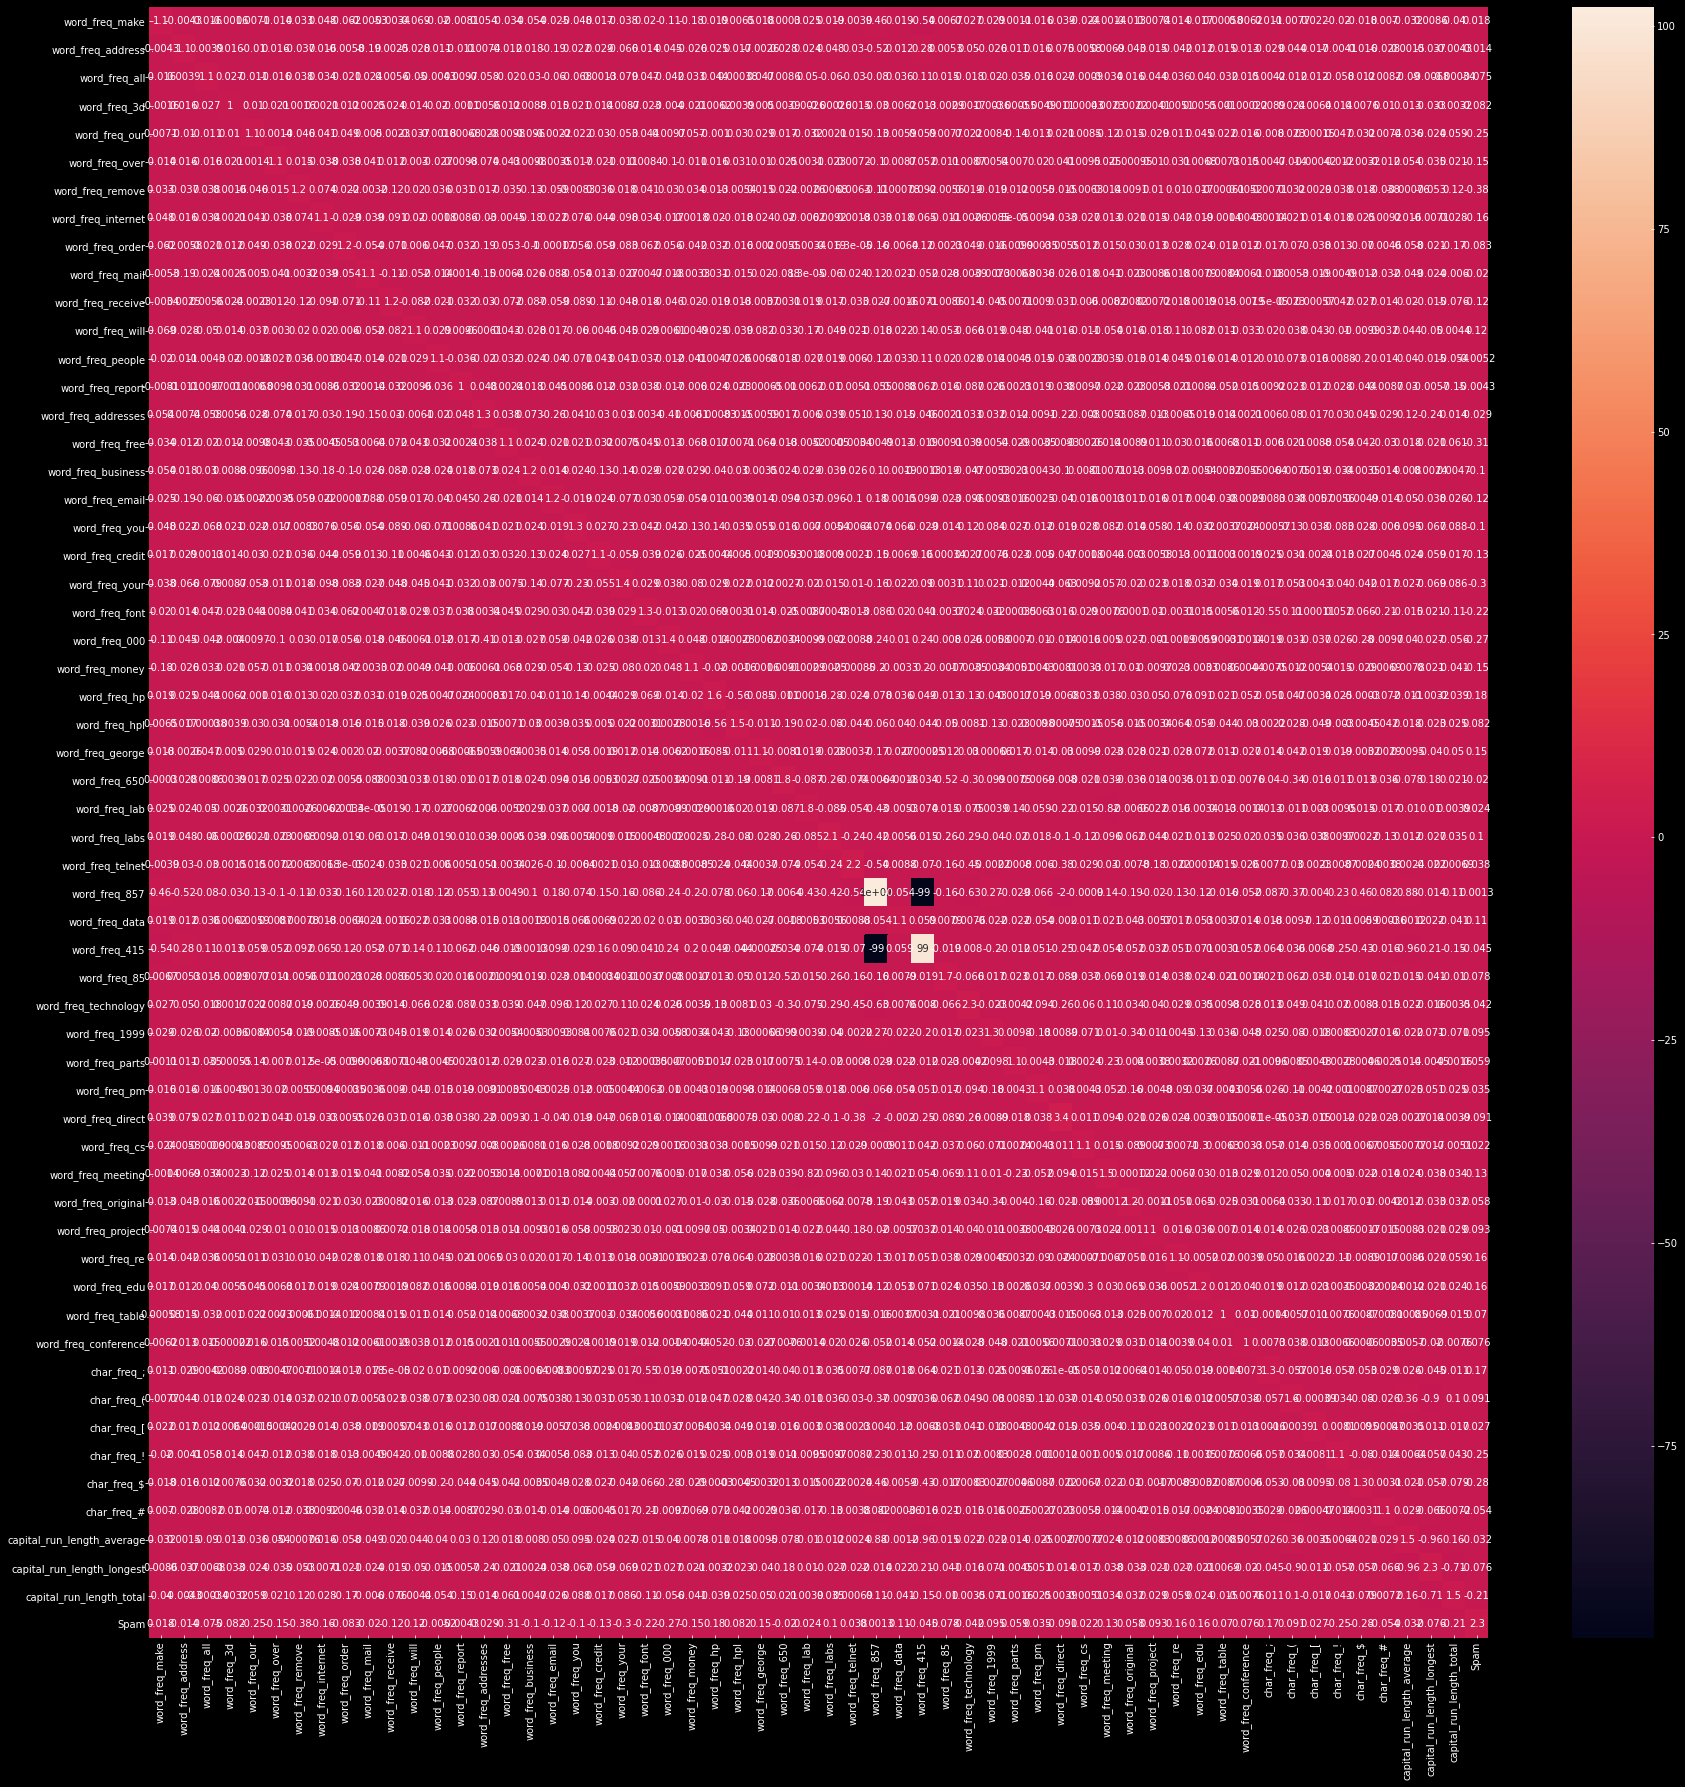

In [22]:
# Checking for multicollinearity

corr_spam = spambase.corr()

vif_spam = pd.DataFrame(np.linalg.inv(corr_spam.values), index = corr_spam.index, columns = corr_spam.columns)

plt.figure(figsize = (30, 30))

sns.heatmap(vif_spam, annot = True)
plt.show()

* The heatmap shows that there is some high correlation between word_freq_857 and word_freq_415. This means that we need to drop these variables and observe impact they have on our model.
* There are no other variables with high linear relationship.

In [ ]:
# Dropping colums with high correlation 

corr_dropped_spam = spambase.drop(['word_freq_857', 'word_freq_415'], axis = 1)

corr_dropped_spam.shape

In [24]:
# we generate our lable and features

X = corr_dropped_spam.drop(['Spam'], axis=1).values

y = corr_dropped_spam['Spam'].values

In [25]:
# implementing the Gaussian classifier while splitting our data set using 
# 80-20 split, 70-30 split, 60-40 split

from sklearn.model_selection import train_test_split

# Creating a list that will determine out test sizes

test_sizes = [0.2, 0.3, 0.4]

# Looping through our list to use different train and test sets

for test in test_sizes:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test, random_state = 25)

  clf = GaussianNB()

  # Fitting our model
  clf.fit(X_train, y_train)

  # Making prediction 

  y_pred = clf.predict(X_test)

  # Evaluating the model

  accuracy = accuracy_score(y_test, y_pred)

  print("Test size: ", test)

  print("Accuracy Score: ", (accuracy*100.0))

  print("\n")


Test size:  0.2
Accuracy Score:  84.08551068883611


Test size:  0.3
Accuracy Score:  83.6104513064133


Test size:  0.4
Accuracy Score:  83.3729216152019




# 8. Conclusion 

* From the modelling done in above it is clear that splitting the dataset using 80-20 split results in higher accuracy. This is because having more data is always good for helping train the model to provide better predictions. 
* Another observation made is that a higher random state parameter results in higher accuracy.
* Normalizing reduces the accuracy of our results. 
* Solving for multicolinearlity by dropping variables that were highly correlated proved effective in increasing the accuracy of our model.